In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [96]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
train.head()
IDs=test[['Id']]

In [97]:
#first address missing data. Drop the serverely missing ones and impute the other missing data.
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [98]:
#drop features with over 10% data missing
featuredrop=(missing_data[missing_data['Total'] > 81]).index
train = train.drop(featuredrop,1)
featuredrop


Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [99]:
#drop same features for test set
test=test.drop(featuredrop,1)

In [100]:
#now convert catagorical data to numerical
categorical_cols = train.columns[train.dtypes==object].tolist()
train[categorical_cols]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [101]:
#transform both data sets
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train[categorical_cols] = train[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))
test[categorical_cols] = test[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [102]:
train=train.fillna(train.mean())
test=test.fillna(test.mean())
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [103]:
#select most important 20 features
core_cols = train.corr().nlargest(20, 'SalePrice')['SalePrice'].index
train = train[core_cols]
testcore=core_cols.drop('SalePrice')
test=test[testcore]


In [114]:
X_train=train.drop('SalePrice', axis=1)
features=X_train.columns.values
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train=std.fit_transform(X_train)
Y_train=train['SalePrice']


In [105]:
test_trans=std.fit_transform(test)

In [60]:
from sklearn.model_selection import cross_val_score
def rmsecv(model):
    rmse=np.sqrt(-cross_val_score(model,X_train, Y_train, scoring='neg_mean_squared_error'))
    return rmse

In [61]:
#first model use linear regression

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
lin_reg.intercept_, lin_reg.coef_


(180921.19589041092,
 array([25991.43218943, 10176.99948849,  7635.61152948,  2118.38035522,
         5707.18142976, 10203.0061333 , -1358.45008074,  2836.92321704,
         3320.73623873,  7047.89427806,  5233.66397978,   587.39811302,
         5193.00688796,  7938.59132488,  2249.76116821,  3981.62100006,
         8553.14232918,   636.8587048 ,  -523.66895693]))

In [62]:
rmsecv(lin_reg).mean()

37525.7528082435

In [63]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 500, random_state = 0, max_features = 4)
rfr.fit(X_train, Y_train)

rmsecv(rfr).mean()

29620.45366464204

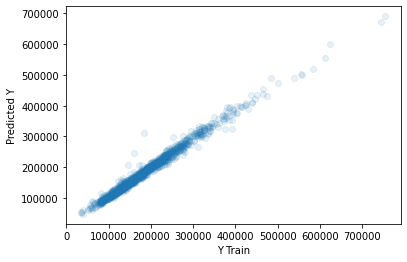

In [64]:
#visualize prediction vs y train
rfr_pred= rfr.predict(X_train)
plt.scatter(Y_train,rfr_pred, alpha=0.1)
plt.xlabel('Y Train')
plt.ylabel('Predicted Y')
plt.show()

In [45]:
#boosting with CV Grid search
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
clf = ensemble.GradientBoostingRegressor(max_features = 4)
grid_search = GridSearchCV(clf, param_grid, scoring="neg_mean_squared_error")
grid_result = grid_search.fit(X_train, Y_train)
grid_result.best_params_


{'learning_rate': 0.1, 'n_estimators': 200}

In [71]:
clf.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=4, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)>

In [73]:
clf.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=4, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [74]:
rmsecv(clf).mean()

27501.191555103644

In [115]:
#review explanatory variables:
print(clf.feature_importances_);
print(features)

['OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea' 'TotalBsmtSF'
 '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt' 'YearRemodAdd'
 'MasVnrArea' 'GarageYrBlt' 'Fireplaces' 'BsmtFinSF1' 'Foundation'
 'WoodDeckSF' '2ndFlrSF' 'OpenPorchSF' 'HalfBath']


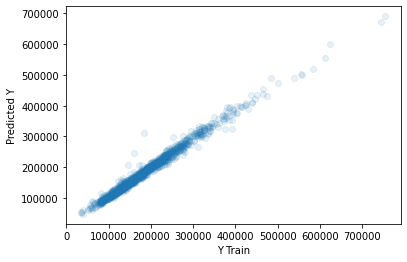

In [75]:
#visualize prediction vs y train
clf_pred= rfr.predict(X_train)
plt.scatter(Y_train,clf_pred, alpha=0.1)
plt.xlabel('Y Train')
plt.ylabel('Predicted Y')
plt.show()

In [94]:
test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1,Foundation,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961,0.0,1961.0,0,468.0,1,140,0,0,0
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,108.0,1958.0,0,923.0,1,393,0,36,1
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,0.0,1997.0,1,791.0,2,212,701,34,1
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,20.0,1998.0,1,602.0,2,360,678,36,1
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,0.0,1992.0,0,263.0,2,0,0,82,0


In [109]:
#predict with forest

forest_predict=IDs.join(pd.DataFrame(rfr.predict(test_trans)))

In [110]:
#predict with boosting
boost_predict=IDs.join(pd.DataFrame(clf.predict(test_trans)))

In [111]:
forest_predict.to_csv('Forest predict.csv',index=False)

In [112]:
boost_predict.to_csv('Gradient Boost predict.csv',index=False)